# Phase 2 Project

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


In [2]:
home = pd.read_csv('data/kc_house_data.csv')

In [3]:
home.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [4]:
home.shape

(21597, 21)

In [5]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
home.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
home['waterfront'].fillna(0, inplace = True)

In [8]:
home['view'].fillna(0, inplace = True)

In [9]:
home.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
home = home.drop(columns = ['id', 'yr_renovated', 'date' ], axis = 1)

In [11]:
home.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
# removing question marks from data
home = home[(home != '?').all(axis=1)]

In [13]:
home = home.dropna()

In [14]:
home.shape

(21143, 18)

In [15]:
home.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
home['sqft_basement'] = home['sqft_basement'].astype(float)

In [17]:
#home = pd.get_dummies(home, prefix=['grade'], columns=['grade'])

In [18]:
home.shape

(21143, 18)

In [19]:
home.loc[home['grade'] == 1, 'grade'] = 1
home.loc[home['grade'] == 2, 'grade'] = 1
home.loc[home['grade'] == 3, 'grade'] = 1
home.loc[home['grade'] == 4, 'grade'] = 2
home.loc[home['grade'] == 5, 'grade'] = 2
home.loc[home['grade'] == 6, 'grade'] = 2
home.loc[home['grade'] == 7, 'grade'] = 3
home.loc[home['grade'] == 8, 'grade'] = 3
home.loc[home['grade'] == 9, 'grade'] = 4
home.loc[home['grade'] == 10, 'grade'] = 4
home.loc[home['grade'] == 11, 'grade'] = 5
home.loc[home['grade'] == 12, 'grade'] = 5
home.loc[home['grade'] == 13, 'grade'] = 5

In [20]:
home['grade'].value_counts()

3    14721
4     3669
2     2259
5      493
1        1
Name: grade, dtype: int64

# Looking at our Target 

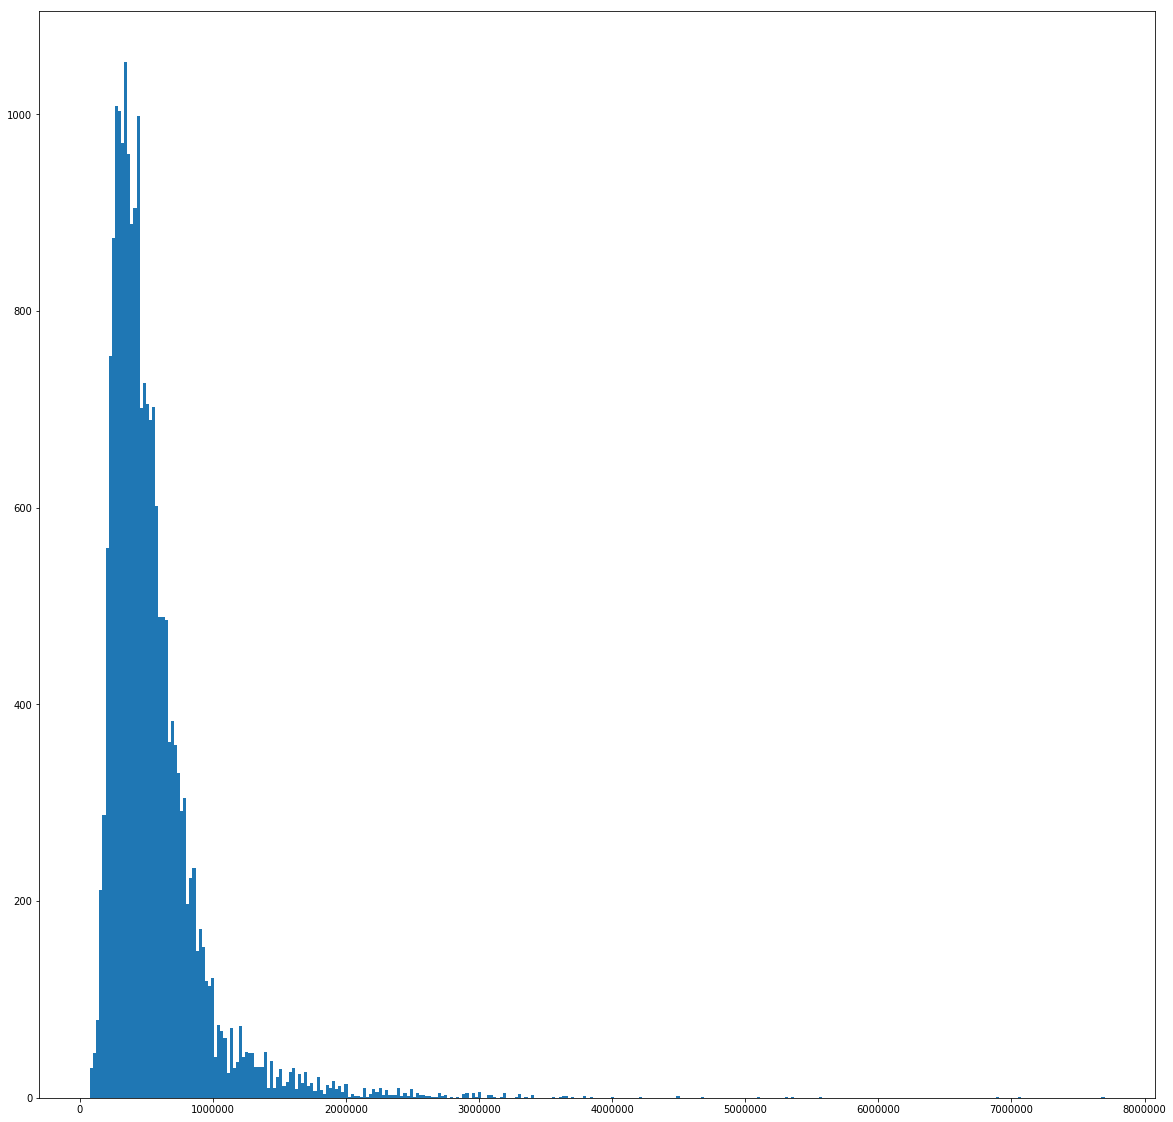

In [21]:
fig, ax = plt.subplots(figsize= (20,20))

ax.hist(home['price'], bins = 'auto');

# Scaling the target to be normally distributed 

In [22]:
home['price'] = np.log(home['price'])

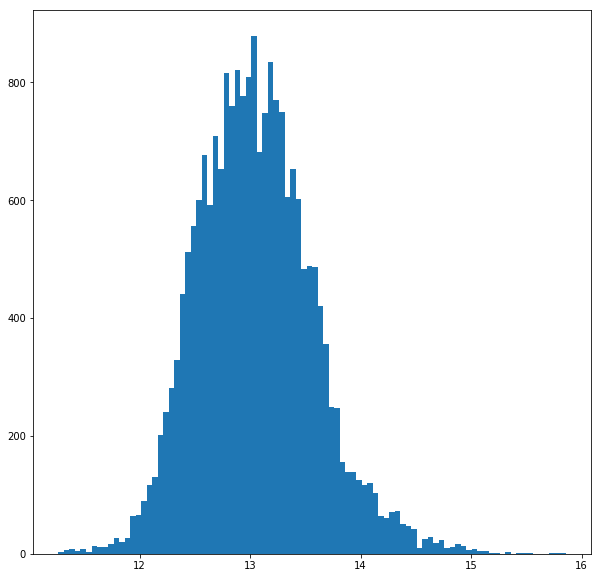

In [23]:
fig, ax = plt.subplots(figsize= (10,10))

ax.hist(home['price'], bins = 'auto');

In [24]:
home = home[(home['price'] < (home['price'].mean() + home['price'].std()*3)) & (home['price'] > (home['price'].mean() - home['price'].std()*3))]

In [25]:
home.shape

(20977, 18)

** I decided to change my Y so its normally distrubited **

In [ ]:
#X_scaled = np.log(X)

In [ ]:
#scatterplot_data = X_scaled

#fig, axes = plt.subplots(ncols= 3, nrows= 6, figsize=(12, 8))
#fig.set_tight_layout(True)

#for index, col in enumerate(scatterplot_data.columns):
#    ax = axes[index//3][index%3]
#    ax.scatter(X_scaled[col], Y, alpha=0.2)
#    ax.set_xlabel(col)
#    ax.set_ylabel("sqft_living")

# Train / Test

In [27]:
X = home.drop('price', axis = 1)
Y = home['price']

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


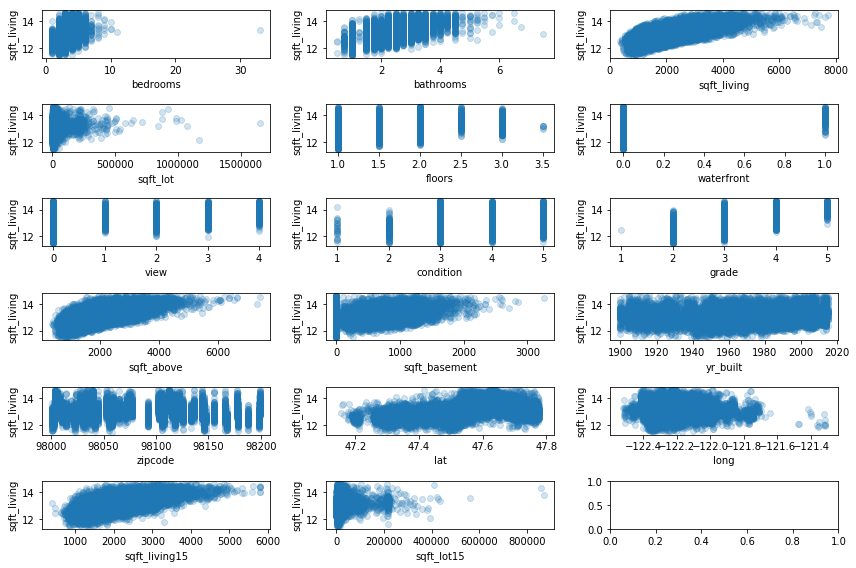

In [28]:
scatterplot_data = X

fig, axes = plt.subplots(ncols= 3, nrows= 6, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X[col], Y, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("sqft_living")

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15732 entries, 4421 to 16266
Data columns (total 17 columns):
bedrooms         15732 non-null int64
bathrooms        15732 non-null float64
sqft_living      15732 non-null int64
sqft_lot         15732 non-null int64
floors           15732 non-null float64
waterfront       15732 non-null float64
view             15732 non-null float64
condition        15732 non-null int64
grade            15732 non-null int64
sqft_above       15732 non-null int64
sqft_basement    15732 non-null float64
yr_built         15732 non-null int64
zipcode          15732 non-null int64
lat              15732 non-null float64
long             15732 non-null float64
sqft_living15    15732 non-null int64
sqft_lot15       15732 non-null int64
dtypes: float64(7), int64(10)
memory usage: 2.2 MB


In [50]:
#fig, ax = plt.subplots(figsize=(10, 5))

#ax.hist(X_train[2:], bins=10);


/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


Text(0.5,1,'Heatmap of Correlation Between Attributes (Including Target)')

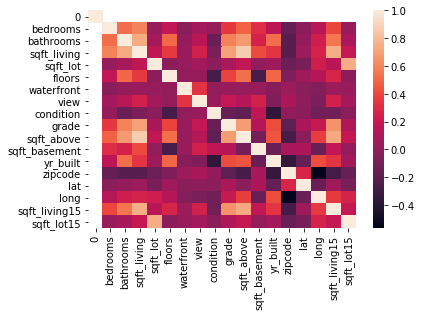

In [51]:
heatmap = pd.concat([y_train, X_train])
corr = heatmap.corr()
sns.heatmap(data = corr)
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)")

In [52]:
#heatmap_data

In [53]:
home_train_corr = home.corr()['price'].map(abs).sort_values(ascending = False)

In [54]:
home_train_corr

price            1.000000
sqft_living      0.672453
grade            0.624775
sqft_living15    0.603533
sqft_above       0.575635
bathrooms        0.526462
lat              0.459471
bedrooms         0.328646
view             0.311921
floors           0.307165
sqft_basement    0.291117
waterfront       0.114168
sqft_lot         0.099469
sqft_lot15       0.091845
yr_built         0.078296
long             0.056590
condition        0.034744
zipcode          0.029537
Name: price, dtype: float64

In [55]:
home['sqft_living'].describe()

count    20977.000000
mean      2060.225533
std        870.545204
min        370.000000
25%       1420.000000
50%       1910.000000
75%       2530.000000
max       7730.000000
Name: sqft_living, dtype: float64

In [56]:
most_correlated_feature = 'sqft_living'

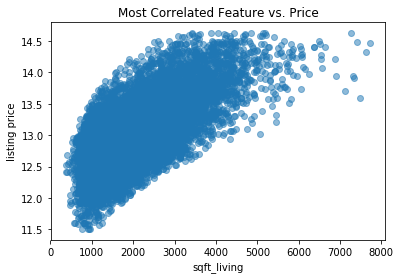

In [57]:
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Price");

In [58]:
#trans_home = pd.get_dummies(home, prefix=['grade'], columns=['grade'])

In [59]:
baseline_model = LinearRegression()

In [60]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=45)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4535057834768664
Validation score: 0.44925008685226625


Because we are using the .score method of LinearRegression, these
are r-squared scores. That means that each of them represents the
amount of variance of the target (listing price) that is explained
by the model's features (currently just the number of pieces) and
parameters (intercept value and coefficient values for the features)

In general this seems like a fairly **WEAK model** . 


In [96]:
df = X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace=True)

df.drop(columns=['level_0', 'level_1'], inplace=True)

df.columns = ['cc']

df.drop_duplicates(inplace=True)

In [97]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.868415
"(sqft_living15, sqft_living)",0.755026


In [61]:
#X_train_numeric = X_train.select_dtypes('number').copy()

#X_train_numeric

In [62]:
#scatterplot_data = X_train_numeric.drop("sqft_living", axis=1)

#fig, axes = plt.subplots(ncols= 3, nrows= 6, figsize=(12, 8))
#fig.set_tight_layout(True)

#for index, col in enumerate(scatterplot_data.columns):
 #   ax = axes[index//3][index%3]
  #  ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
   # ax.set_xlabel(col)
   # ax.set_ylabel("sqft_living")

In [44]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: True
waterfront: True
view: True
condition: True
grade: True
sqft_above: True
sqft_basement: True
yr_built: True
zipcode: True
lat: True
long: True
sqft_living15: True
sqft_lot15: True


In [63]:
X_train_second_model = X_train.drop(['sqft_lot'], axis = 1).copy()

#X_train_second_model

In [64]:
#X_train_second_model = X_train_numeric.drop(['lat', 'long'], axis = 1).copy()

In [65]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.7391051295739487
Validation score: 0.7356043246036146

Baseline Model
Train score:      0.4535057834768664
Validation score: 0.44925008685226625


In [66]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     2958.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:27:38   Log-Likelihood:                -809.47
No. Observations:               15732   AIC:                             1651.
Df Residuals:                   15716   BIC:                             1774.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.7222      4.355     -1.544      0.123     -15.259       1.814
bedrooms         -0.0288      0.003     -9.763      0.000      -0.035      -0.023
bathrooms         0.0795      0.005     16.488      0.000       0.070       0.089
sqft_living       0.0001   3.44e-06     35.112      0.000       0.000       0.000
floors            0.0980      0.005     18.298      0.000       0.088       0.109
waterfront        0.3099      0.032      9.615      0.000       0.247       0.373
view              0.0691      0.003     21.298      0.000       0.063       0.076
condition         0.0544      0.003     15.860      0.000       0.048       0.061
grade             0.2017      0.005     37.790      0.000       0.191       0.212
sqft_above     5.864e-05   3.36e-06     17.430      0.000     5.2e-05    6.52e-05
sqft_basement  6.209e-05   3.98e-06     15.619      0.000    5.43e-05    6.99e-05
yr_built         -0.0034      0.000    -32.846      0.000      -0.004      -0.003
zipcode          -0.0006   4.91e-05    -13.227      0.000      -0.001      -0.001
lat               1.4166      0.016     89.356      0.000       1.386       1.448
long             -0.1726      0.020     -8.798      0.000      -0.211      -0.134
sqft_living15     0.0001   5.08e-06     23.254      0.000       0.000       0.000
sqft_lot15     1.589e-07   7.77e-08      2.045      0.041    6.56e-09    3.11e-07
==============================================================================
Omnibus:                      153.777   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.893
Skew:                           0.034   Prob(JB):                     4.47e-56
Kurtosis:                       3.620   Cond. No.                     4.30e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.34e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
X_train_for_RFECV = StandardScaler().fit_transform(X_train.drop(['sqft_lot'], axis = 1))

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: True
waterfront: True
view: True
condition: True
grade: True
sqft_above: True
sqft_basement: True
yr_built: True
zipcode: True
lat: True
long: True
sqft_living15: False


IndexError: index 16 is out of bounds for axis 0 with size 16

In [94]:
df = X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace=True)

df.drop(columns=['level_0', 'level_1'], inplace=True)

df.columns = ['cc']

df.drop_duplicates(inplace=True)

In [95]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.868415
"(sqft_living15, sqft_living)",0.755026


In [70]:
#X_train_third_model = X_train_numeric.drop(['sqft_lot'], axis = 1).copy()

In [72]:
X_train_third_model = X_train.drop(['sqft_lot','grade','bathrooms','sqft_above', 'sqft_living15','lat','long','zipcode'], axis = 1).copy()

In [73]:
third_model = LinearRegression()

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.5245970384745835
Validation score: 0.5200260546705137

Baseline Model
Train score:      0.4535057834768664
Validation score: 0.44925008685226625


In [74]:
sm.OLS(y_train, sm.add_constant(X_train_third_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     1920.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:27:58   Log-Likelihood:                -5524.4
No. Observations:               15732   AIC:                         1.107e+04
Df Residuals:                   15722   BIC:                         1.115e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.9994      0.230     82.495      0.000      18.548      19.451
bedrooms         -0.0536      0.004    -13.849      0.000      -0.061      -0.046
sqft_living       0.0004   4.96e-06     81.436      0.000       0.000       0.000
floors            0.1751      0.007     26.285      0.000       0.162       0.188
waterfront        0.2341      0.043      5.387      0.000       0.149       0.319
view              0.0732      0.004     17.118      0.000       0.065       0.082
condition         0.0363      0.005      7.928      0.000       0.027       0.045
sqft_basement  1.501e-05   8.13e-06      1.846      0.065   -9.24e-07    3.09e-05
yr_built         -0.0036      0.000    -30.517      0.000      -0.004      -0.003
sqft_lot15    -5.421e-07   1.02e-07     -5.301      0.000   -7.43e-07   -3.42e-07
==============================================================================
Omnibus:                       27.166   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.286
Skew:                          -0.102   Prob(JB):                     1.19e-06
Kurtosis:                       2.996   Cond. No.                     2.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
X_train_fifth_model = X_train.drop(['sqft_lot','grade','bathrooms','sqft_above', 'sqft_living15','lat','long','zipcode', 'sqft_basement'], axis = 1).copy()

In [77]:
fifth_model = LinearRegression()

fifth_model_scores = cross_validate(
    estimator=fifth_model,
    X=X_train_fifth_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", fifth_model_scores["train_score"].mean())
print("Validation score:", fifth_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.5244772637632258
Validation score: 0.5200101672084328

Baseline Model
Train score:      0.4535057834768664
Validation score: 0.44925008685226625


In [78]:
sm.OLS(y_train, sm.add_constant(X_train_fifth_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     2160.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:28:14   Log-Likelihood:                -5526.1
No. Observations:               15732   AIC:                         1.107e+04
Df Residuals:                   15723   BIC:                         1.114e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          19.0415      0.229     83.079      0.000      18.592      19.491
bedrooms       -0.0531      0.004    -13.758      0.000      -0.061      -0.046
sqft_living     0.0004   4.46e-06     91.518      0.000       0.000       0.000
floors          0.1702      0.006     27.854      0.000       0.158       0.182
waterfront      0.2316      0.043      5.331      0.000       0.146       0.317
view            0.0744      0.004     17.592      0.000       0.066       0.083
condition       0.0369      0.005      8.085      0.000       0.028       0.046
yr_built       -0.0036      0.000    -30.852      0.000      -0.004      -0.003
sqft_lot15  -5.633e-07   1.02e-07     -5.543      0.000   -7.63e-07   -3.64e-07
==============================================================================
Omnibus:                       28.472   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.614
Skew:                          -0.104   Prob(JB):                     6.12e-07
Kurtosis:                       2.989   Cond. No.                     2.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Now Categ

In [79]:
categoricals = ['waterfront', 'view', 'condition', 'grade']

X_train_categoricals = X_train.loc[:,categoricals]
X_test_categoricals = X_test.loc[:,categoricals]

In [80]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
enc = ohe.fit(X_train_categoricals)
X_train_trans_categ = enc.transform(X_train_categoricals)
X_test_trans_categ = enc.transform(X_test_categoricals)

X_train_trans_categ_df = pd.DataFrame(X_train_trans_categ.todense(), columns=ohe.get_feature_names(categoricals))
X_test_trans_categ_df = pd.DataFrame(X_test_trans_categ.todense(), columns=ohe.get_feature_names(categoricals))
X_train_trans_categ_df

,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,grade_2,grade_3,grade_4,grade_5
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [81]:
categoricals = ['waterfront', 'view', 'condition', 'grade']

X_train_categoricals = X_train.loc[:,categoricals]
X_test_categoricals = X_test.loc[:,categoricals]

In [82]:
categoricals = ['view', 'waterfront', 'condition','grade']

X_train_categoricals = X_train.loc[:,categoricals]

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
X_train_trans_categ = ohe.fit_transform(X_train_categoricals)

X_train_trans_categ_df = pd.DataFrame(X_train_trans_categ.todense(), columns=ohe.get_feature_names(categoricals))
X_train_trans_categ_df.head()

,view_1.0,view_2.0,view_3.0,view_4.0,waterfront_1.0,condition_2,condition_3,condition_4,condition_5,grade_2,grade_3,grade_4,grade_5
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [83]:
X_rest = X_train.drop(categoricals, axis=1)


In [84]:
X_rest.reset_index(drop=True, inplace=True)
X_train_trans_categ_df.reset_index(drop=True, inplace=True)

#X_test.reset_index(drop=True, inplace=True)
#X_test_trans_categ_df.reset_index(drop=True, inplace=True)

X_train_with_dummy = pd.concat([X_rest, X_train_trans_categ_df], axis=1)
#X_test_with_dummy = pd.concat([X_test, X_test_trans_categ_df], axis=1)
X_train_with_dummy

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,...,view_4.0,waterfront_1.0,condition_2,condition_3,condition_4,condition_5,grade_2,grade_3,grade_4,grade_5
0,4,1.75,1870,22072,1.0,1070,800.0,1959,98042,47.3775,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0.75,370,1801,1.0,370,0.0,1923,98117,47.6778,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,3,1.75,1640,18730,1.5,1640,0.0,1946,98004,47.5975,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3,2.25,1370,6600,2.0,1370,0.0,1993,98038,47.3504,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,2.25,3220,9603,2.0,3220,0.0,1972,98052,47.6474,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,3,2.25,2770,15886,2.0,2770,0.0,1982,98177,47.7464,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,5,3.00,3320,5354,2.0,3320,0.0,2004,98103,47.6542,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,3,2.50,2580,23925,2.0,2580,0.0,2001,98023,47.2978,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,5,3.25,2680,3011,2.0,1870,810.0,1910,98122,47.6115,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,4,2.50,2650,10459,2.0,2650,0.0,1989,98003,47.2739,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#X_train_combine = pd.concat([X_rest, X_train_trans_categ_df], axis=1).fillna(0)


In [ ]:
#X_train_combine

In [ ]:
#X_train_numeric = X_train.select_dtypes('number').copy()

In [ ]:
#X_train_combine = X_train_combine.reshape(X_train_combine.shape[1:])

In [85]:
X_train_fourth_model = X_train_with_dummy

In [86]:
fourth_model = LinearRegression()

fourth_model_scores = cross_validate(
    estimator=fourth_model,
    X=X_train_fourth_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.7432884055177867
Validation score: 0.7397880496366093

Baseline Model
Train score:      0.4535057834768664
Validation score: 0.44925008685226625


In [88]:
#sm.OLS(y_train, sm.add_constant(X_train_fourth_model)).fit().summary()

In [91]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [92]:
from sklearn.metrics import mean_squared_error

In [93]:
# Predict y hat with the training data set
y_train_hat = lr.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_hat)
rmse_train = mean_squared_error(y_train, y_train_hat, squared=False)
r2_train = lr.score(X_train, y_train)

print(f'Evaluate Model Prediction with Training Dataset:')
print('------------------------------------------------')
print(f'Mean Squared Error: {mse_train}')
print(f'Root Mean Squared Error: {rmse_train}')
print(f'R^2: {r2_train}')

Evaluate Model Prediction with Training Dataset:
------------------------------------------------
Mean Squared Error: 0.06469146086276742
Root Mean Squared Error: 0.2543451608793991
R^2: 0.7392526676633973


In [89]:
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder object to create dummies by dropping the first category
ohe = OneHotEncoder(drop = 'first')

# Transform the dataset into dummies matrix
trans = ohe.fit_transform(X_train_combine)

# Dummies values in matrix form (without column names)
data = trans.todense()

# New dummy column names
names = ohe.get_feature_names()

# Combine the values and column names into single dataframe
trans_home= pd.DataFrame(data, columns=names)

NameError: name 'X_train_combine' is not defined